In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")

In [14]:
file_lane_map = {
    "intersection_sim/combined_batch_results_1_lane.csv": 1,
    "intersection_sim/combined_batch_results_2_lane.csv": 2,
    "intersection_sim/combined_batch_results_3_lane.csv": 3,
    "intersection_sim/combined_batch_results_5_lane.csv": 5,
}

# List to hold individual DataFrames
all_dataframes = []

In [15]:
# Load each file, add the 'num_lanes' column, and append to the list
print("Loading data files...")
for file_path, lanes in file_lane_map.items():
        df = pd.read_csv(file_path)
        df['num_lanes'] = lanes
        all_dataframes.append(df)
        print(f"Loaded {file_path} ({len(df)} rows)")


Loading data files...
Loaded intersection_sim/combined_batch_results_1_lane.csv (1201200 rows)
Loaded intersection_sim/combined_batch_results_2_lane.csv (1201200 rows)
Loaded intersection_sim/combined_batch_results_3_lane.csv (1201200 rows)
Loaded intersection_sim/combined_batch_results_5_lane.csv (1201200 rows)


In [16]:
# Check if any dataframes were loaded
if not all_dataframes:
    print("Error: No data files were loaded successfully. Cannot proceed.")
else:
    # Concatenate all DataFrames into one
    combined_df = pd.concat(all_dataframes, ignore_index=True)
    print(f"\nCombined DataFrame created with {len(combined_df)} total rows.")
    print("\nColumns in the combined DataFrame:")
    print(combined_df.columns)


Combined DataFrame created with 4804800 total rows.

Columns in the combined DataFrame:
Index(['RunId', 'iteration', 'Step', 'width', 'height', 'num_lanes',
       'light_strategy', 'traffic_condition', 'car_speed',
       'TrafficFlowPerInterval', 'AverageWaitingTime'],
      dtype='object')


In [17]:
    # Define scenarios based on traffic condition and speed
    def map_scenario(row):
        if row['traffic_condition'] == 'Normale tijd' and row['car_speed'] == 2:
            return 'Scenario 1: Low traffic + Low speed'
        elif row['traffic_condition'] == 'Normale tijd' and row['car_speed'] == 5:
            return 'Scenario 2: Low traffic + High speed'
        elif row['traffic_condition'] == 'Spitsuur' and row['car_speed'] == 2:
            return 'Scenario 3: High traffic + Low speed'
        elif row['traffic_condition'] == 'Spitsuur' and row['car_speed'] == 5:
            return 'Scenario 4: High traffic + High speed'
        else:
            return 'Other' # Should not happen based on previous steps

    combined_df['Scenario'] = combined_df.apply(map_scenario, axis=1)
    print("\nScenario mapping applied.")
    print("Scenario value counts:")
    print(combined_df['Scenario'].value_counts())


Scenario mapping applied.
Scenario value counts:
Scenario
Scenario 1: Low traffic + Low speed      1201200
Scenario 3: High traffic + Low speed     1201200
Scenario 2: Low traffic + High speed     1201200
Scenario 4: High traffic + High speed    1201200
Name: count, dtype: int64


In [20]:
    def make_plots(performance_metric_column="AverageWaitingTime"):

        # Calculate the mean of the performance metric for each unique combination
        aggregated_df = combined_df.groupby(
            ['Scenario', 'num_lanes', 'light_strategy']
        )[performance_metric_column].mean().reset_index()


        scenarios_to_plot = sorted(combined_df['Scenario'].unique())
        if 'Other' in scenarios_to_plot:
             scenarios_to_plot.remove('Other') # Exclude any rows that didn't match scenarios

        print(f"\nGenerating plots for scenarios: {scenarios_to_plot}")

        plt.style.use('seaborn-v0_8-whitegrid') # Use a seaborn style

        for scenario in scenarios_to_plot:
            plt.figure(figsize=(12, 7)) # Create a new figure for each plot

            # Filter data for the current scenario
            scenario_data = aggregated_df[aggregated_df['Scenario'] == scenario]

            # Create the bar plot
            ax = sns.barplot(
                data=scenario_data,
                x='num_lanes',
                y=performance_metric_column,
                hue='light_strategy',
                palette='viridis',
                errorbar=None
            )

            # Set title and labels
            ax.set_title(f'Performance Comparison for {scenario}', fontsize=16, pad=20)
            ax.set_xlabel('Number of Lanes', fontsize=12)
            ax.set_ylabel(f'Average {performance_metric_column.replace("_", " ").title()}', fontsize=12) # Nicer label
            ax.legend(title='Light Strategy', title_fontsize='11', fontsize='10')

            # Improve layout and display plot
            plt.tight_layout()
            plt.show()


Generating plots for scenarios: ['Scenario 1: Low traffic + Low speed', 'Scenario 2: Low traffic + High speed', 'Scenario 3: High traffic + Low speed', 'Scenario 4: High traffic + High speed']


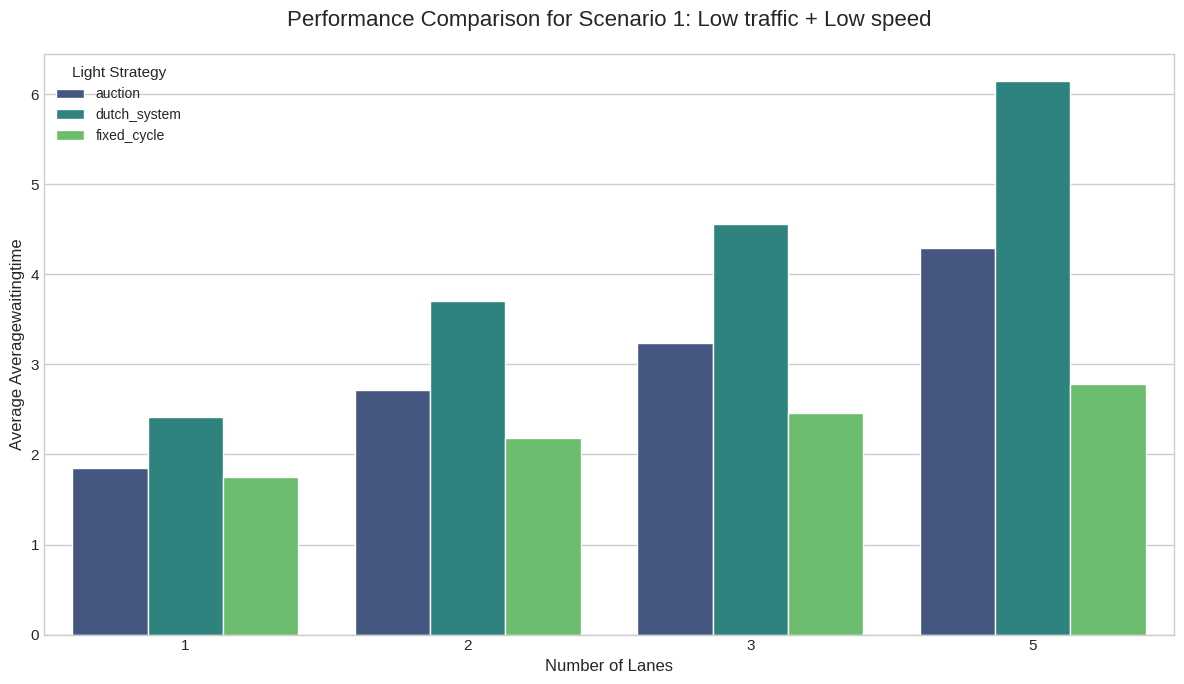

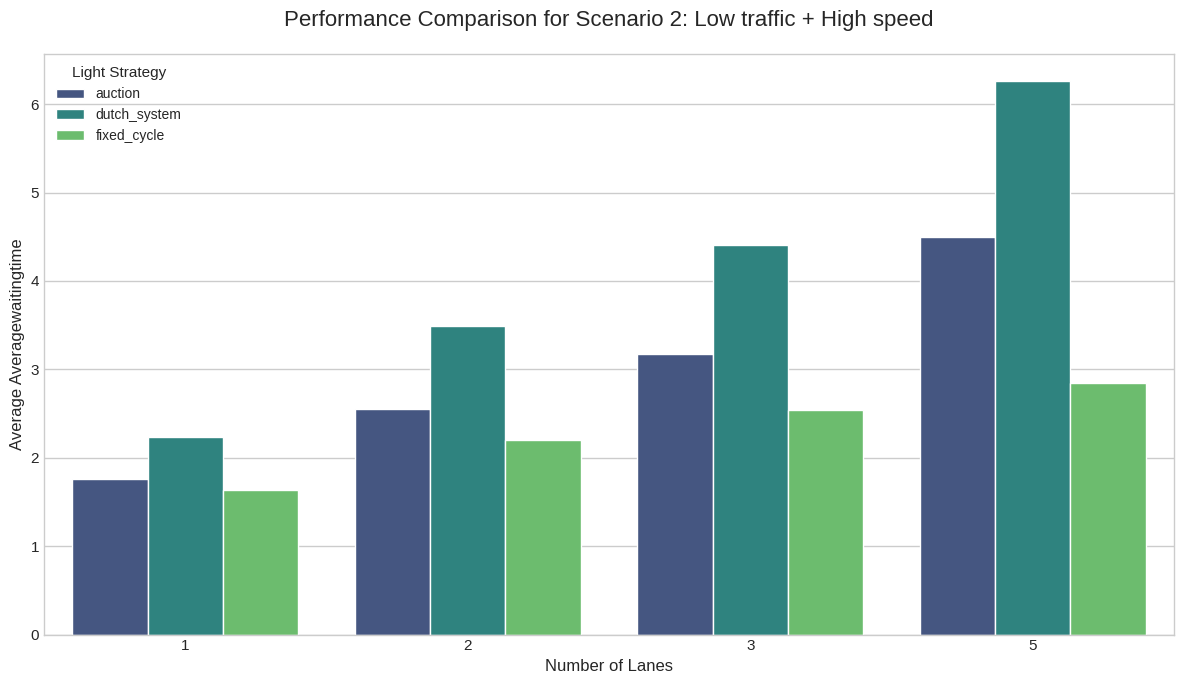

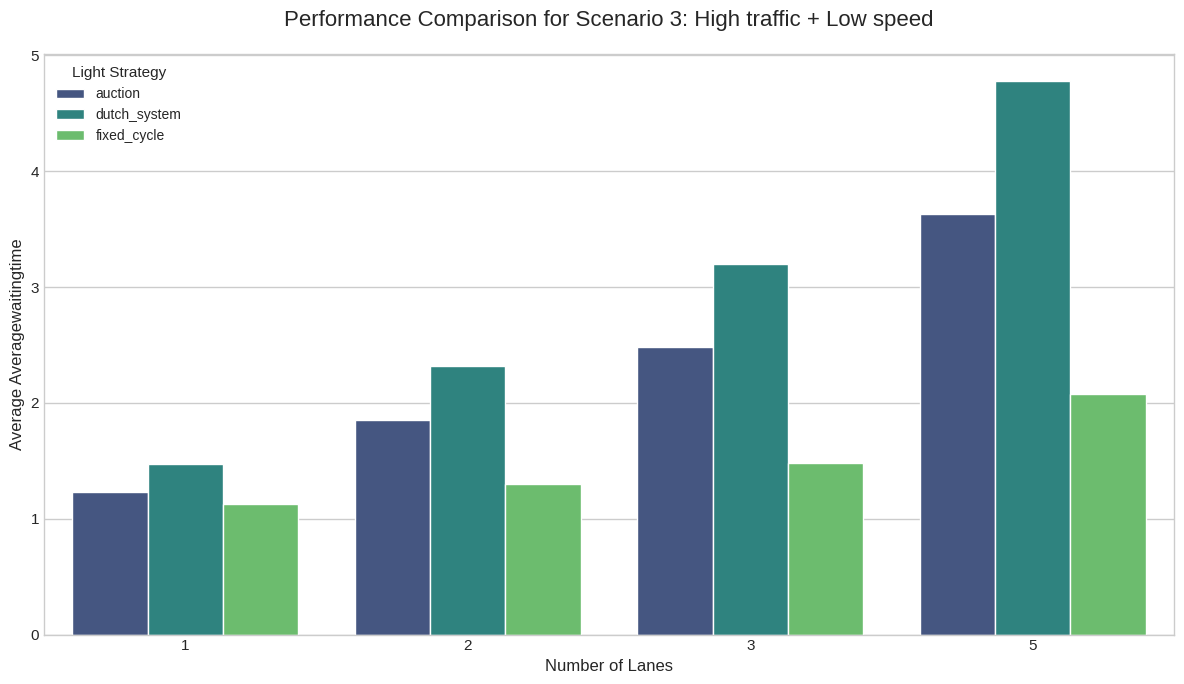

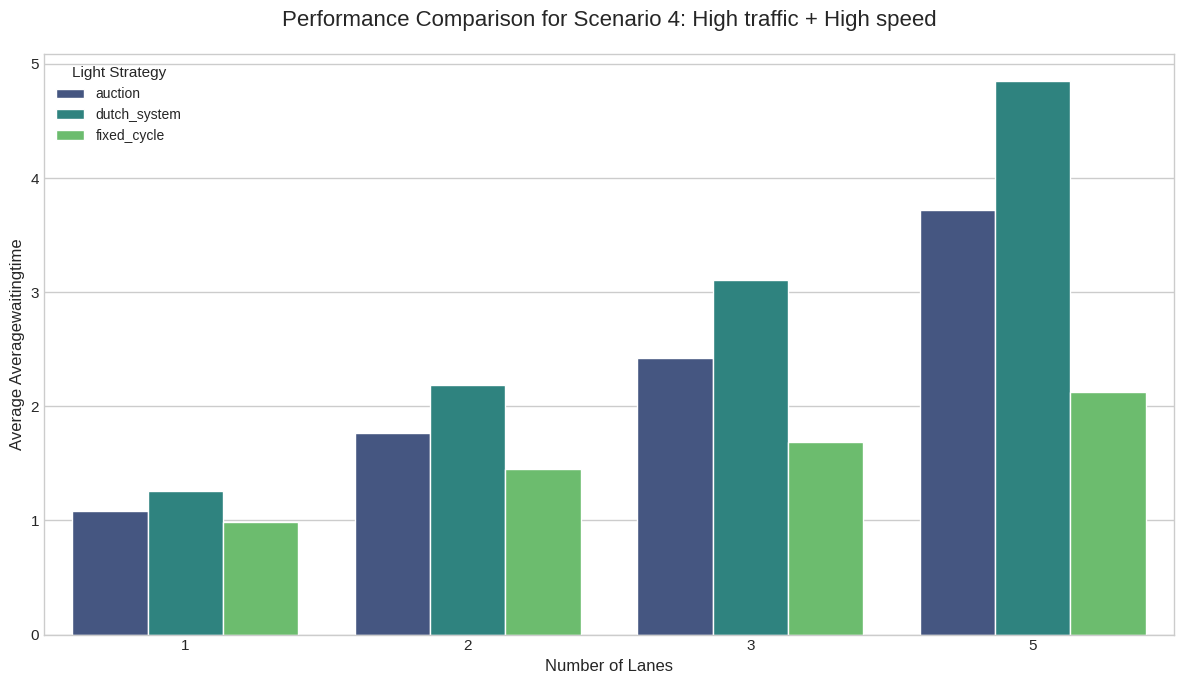

In [22]:
make_plots("AverageWaitingTime")


Generating plots for scenarios: ['Scenario 1: Low traffic + Low speed', 'Scenario 2: Low traffic + High speed', 'Scenario 3: High traffic + Low speed', 'Scenario 4: High traffic + High speed']


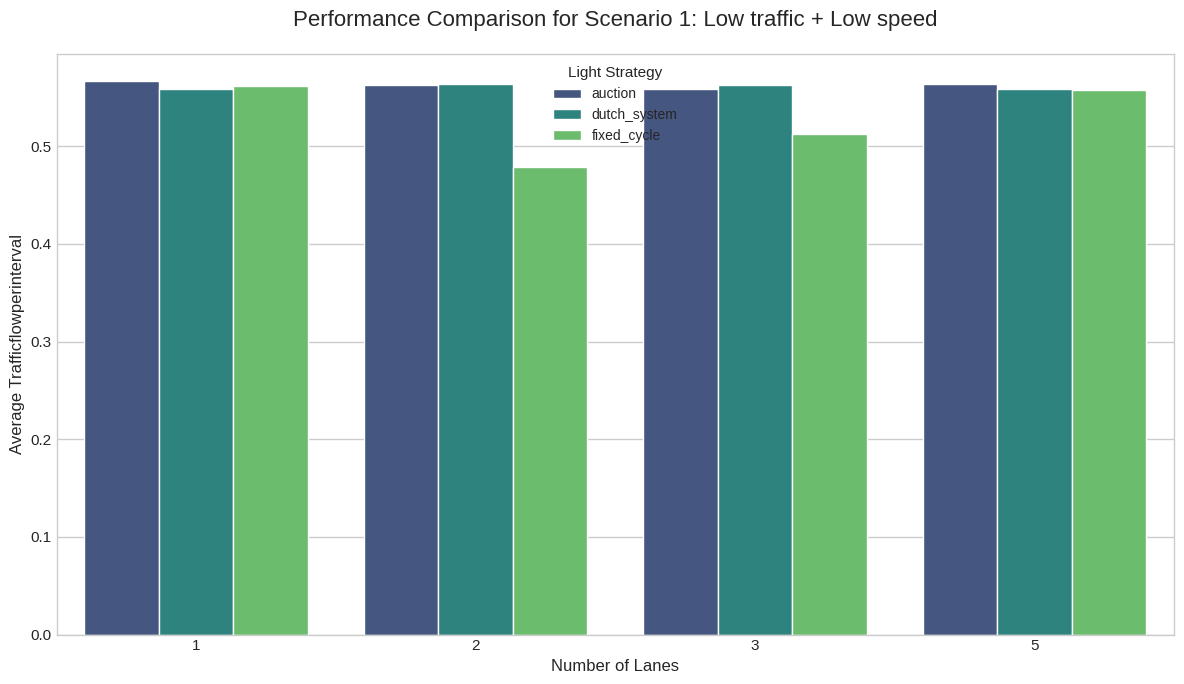

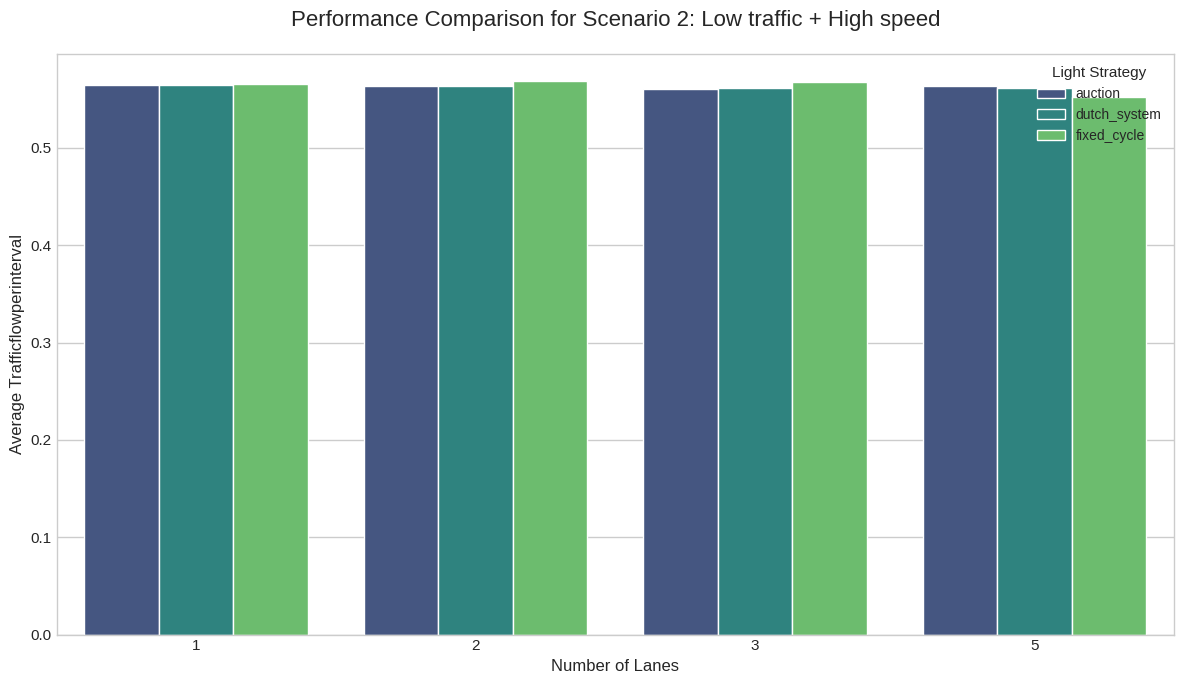

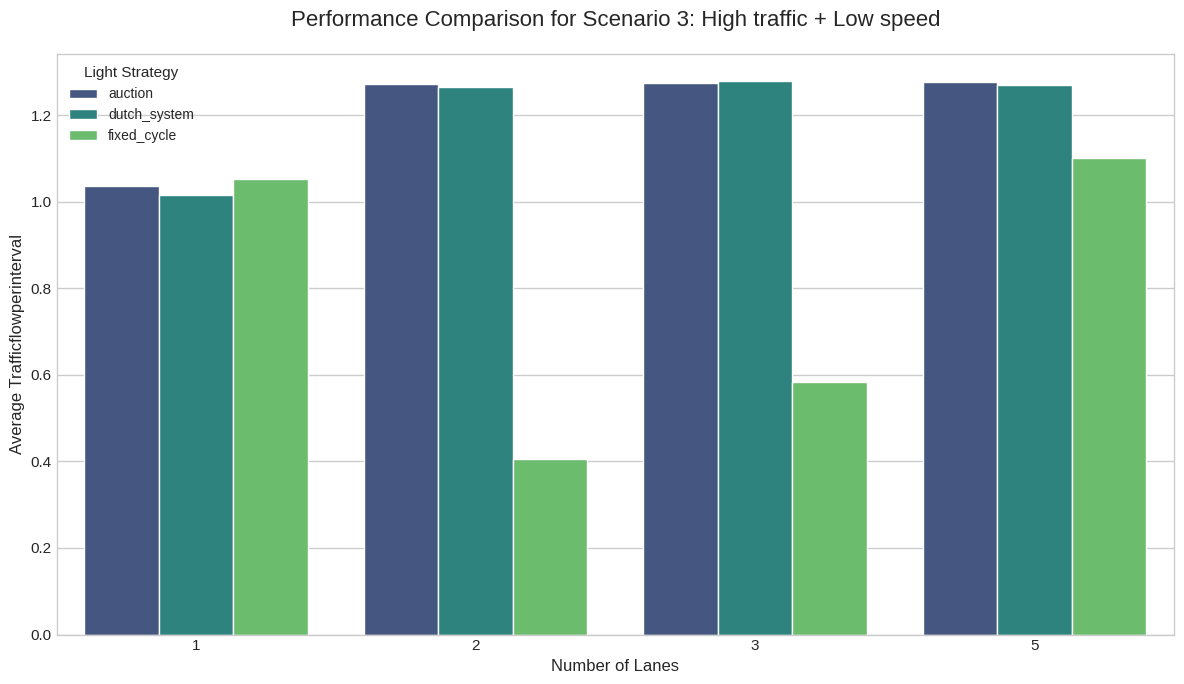

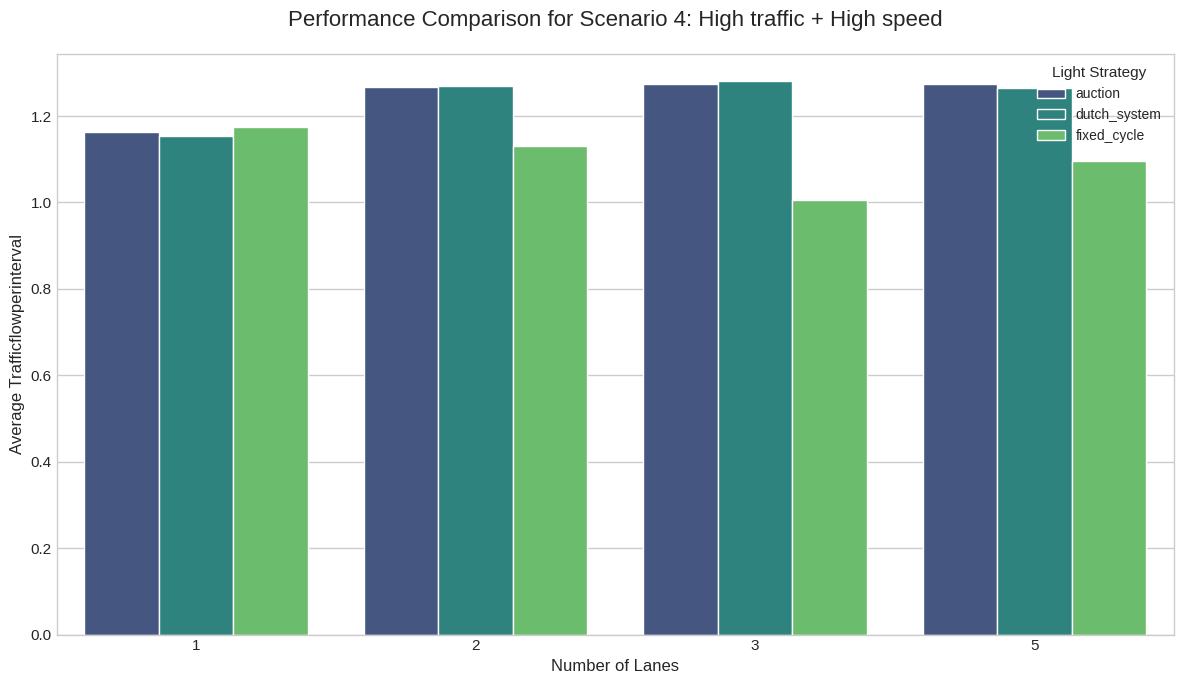

In [23]:
make_plots("TrafficFlowPerInterval")